   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  

D

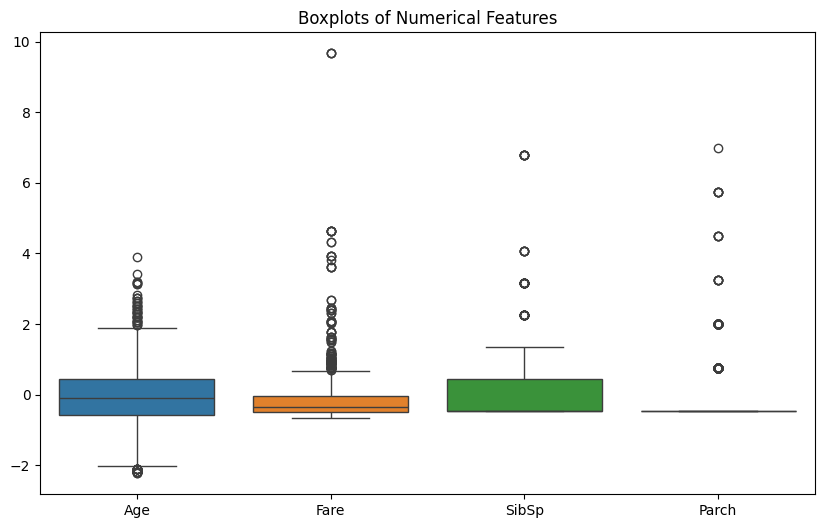

In [1]:
#task1
#1
import pandas as pd

df=pd.read_csv("/content/Titanic-Dataset.csv")

# Basic info
print(df.head())
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())

#2
# Safely fill missing values (no chained assignment)
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop 'Cabin' if present
if 'Cabin' in df.columns:
    df.drop('Cabin', axis=1, inplace=True)

# Confirm
print(df.isnull().sum())

#3
# Convert 'Sex' to numerical (binary)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Encode 'Embarked' if it exists
if 'Embarked' in df.columns:
    df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

cols_to_drop = ['Name', 'Ticket']
df.drop(columns=[col for col in cols_to_drop if col in df.columns], inplace=True)

#4
from sklearn.preprocessing import StandardScaler

# List of numerical columns
num_cols = ['Age', 'Fare', 'SibSp', 'Parch']

# Initialize scaler
scaler = StandardScaler()

# Apply scaler
df[num_cols] = scaler.fit_transform(df[num_cols])

#5
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize outliers using boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Age', 'Fare', 'SibSp', 'Parch']])
plt.title("Boxplots of Numerical Features")
plt.show()

# Remove outliers using IQR method (example on 'Fare')
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Keep rows within bounds
df = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]


       PassengerId    Survived     Pclass         Sex         Age       SibSp  \
count   775.000000  775.000000  775.00000  775.000000  775.000000  775.000000   
mean    445.806452    0.339355    2.48000    0.314839   -0.047099   -0.077658   
std     260.116285    0.473796    0.73439    0.464752    0.982304    0.816458   
min       1.000000    0.000000    1.00000    0.000000   -2.224156   -0.474545   
25%     213.500000    0.000000    2.00000    0.000000   -0.565736   -0.474545   
50%     450.000000    0.000000    3.00000    0.000000   -0.104637   -0.474545   
75%     670.500000    1.000000    3.00000    1.000000    0.356462    0.432793   
max     891.000000    1.000000    3.00000    1.000000    3.891554    4.062148   

            Parch        Fare  
count  775.000000  775.000000  
mean    -0.050830   -0.289579  
std      0.975558    0.273391  
min     -0.473674   -0.648422  
25%     -0.473674   -0.489442  
50%     -0.473674   -0.386671  
75%     -0.473674   -0.124920  
max      6.974

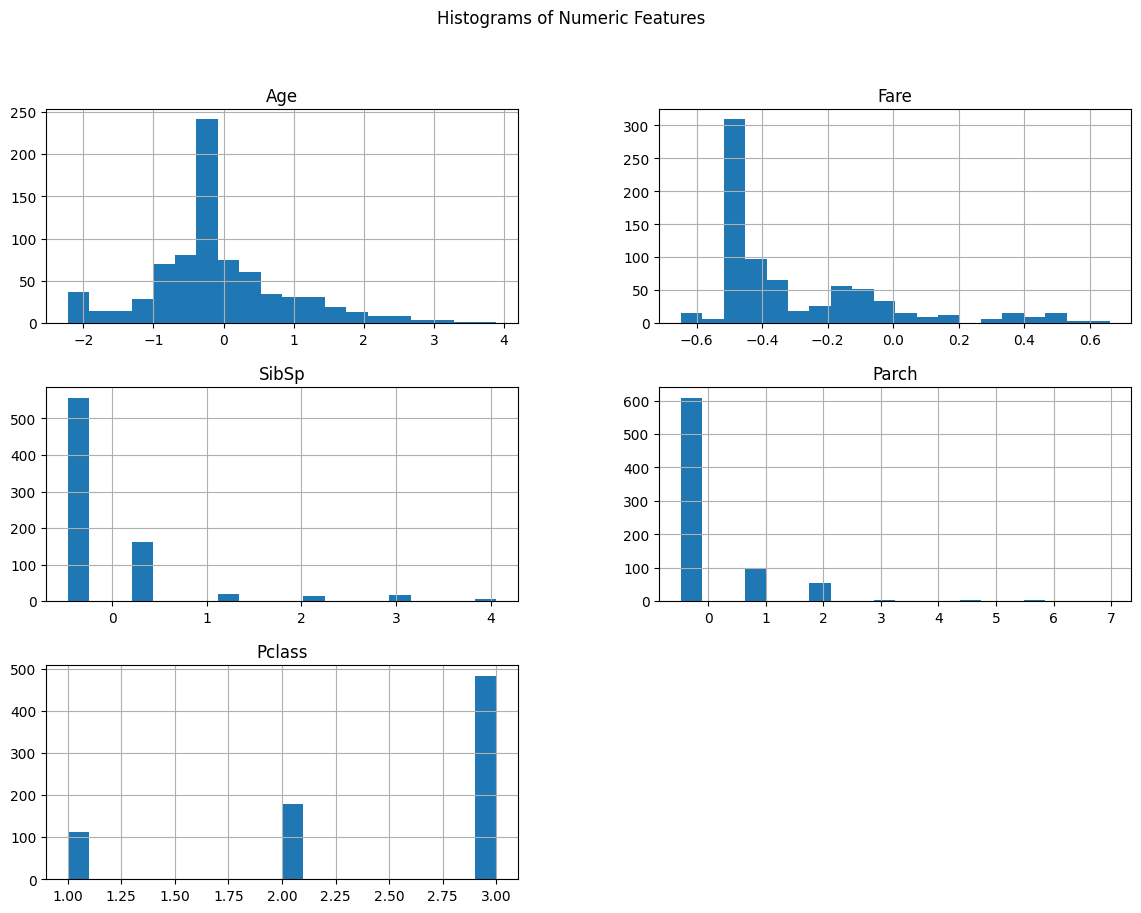

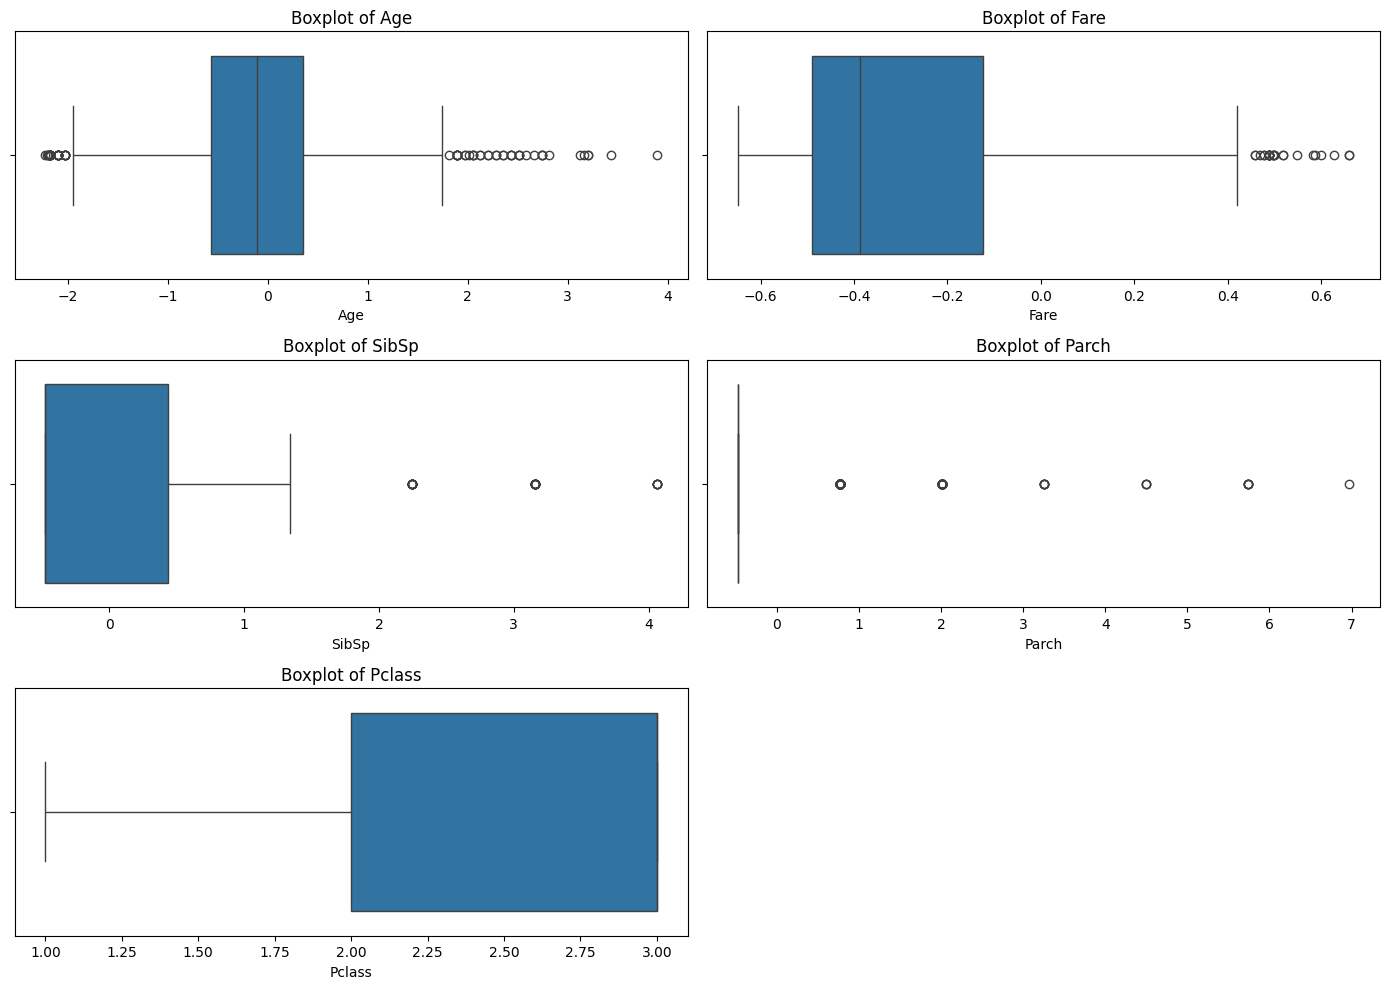

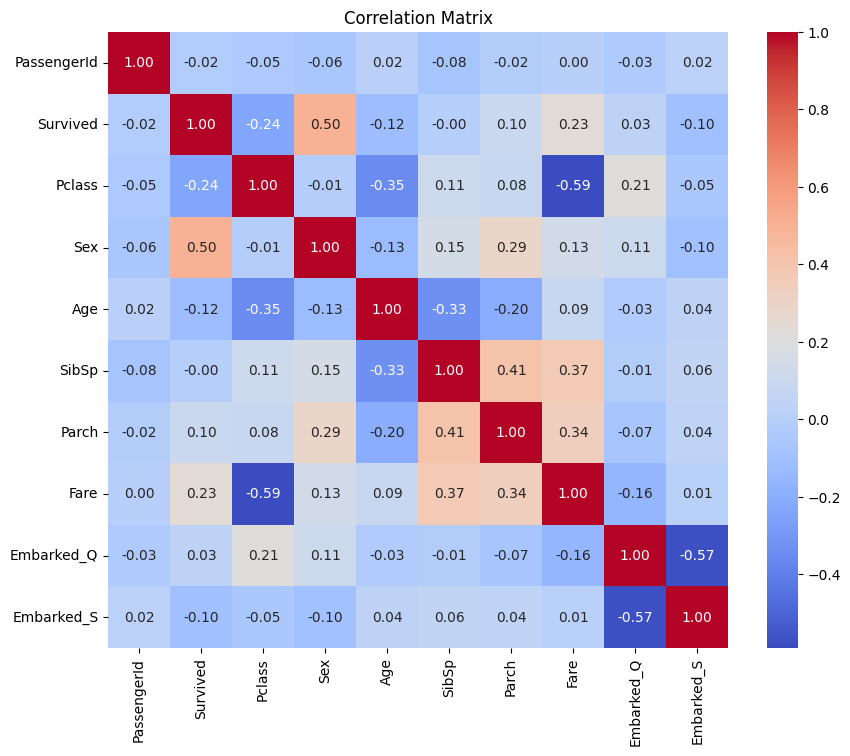

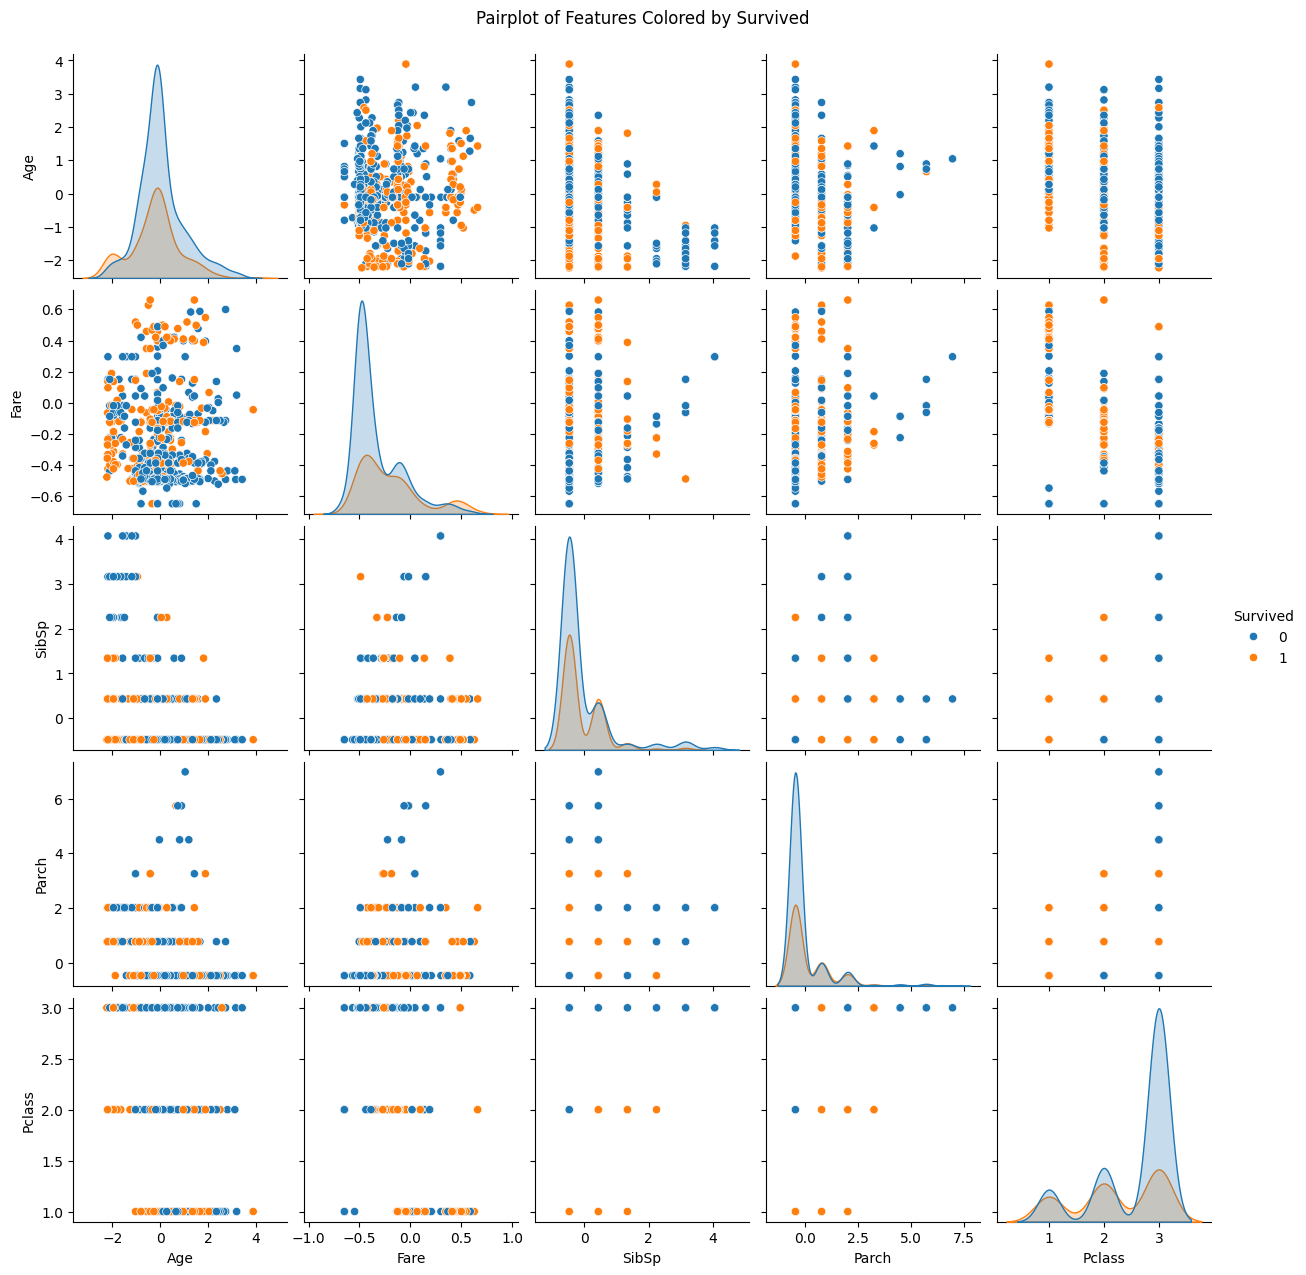

Passengers with very high fare:
 Empty DataFrame
Columns: [PassengerId, Fare, Survived]
Index: []

Survival Rate by Class:
 Pclass
1    0.508929
2    0.486034
3    0.245868
Name: Survived, dtype: float64


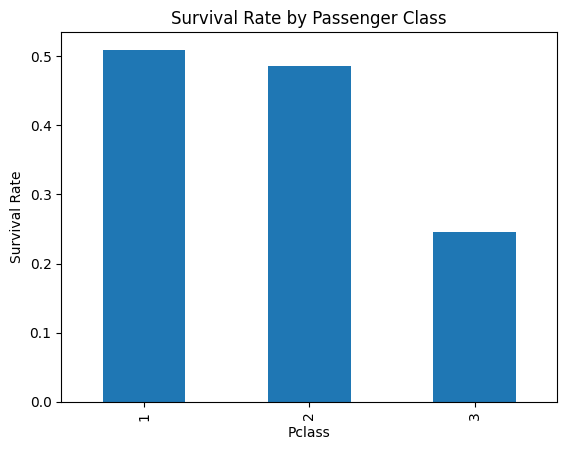

In [11]:
#task2
#1
import pandas as pd

# Summary statistics
summary = df.describe()
print(summary)

# Additional: Median for all columns
medians = df.median(numeric_only=True)
print("\nMedians:\n", medians)

#2
import matplotlib.pyplot as plt
import seaborn as sns

numeric_features = ['Age', 'Fare', 'SibSp', 'Parch', 'Pclass']

# Histograms
df[numeric_features].hist(bins=20, figsize=(14, 10))
plt.suptitle('Histograms of Numeric Features')
plt.show()

# Boxplots
plt.figure(figsize=(14, 10))
for i, feature in enumerate(numeric_features):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

#3
# Correlation matrix
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Pairplot
sns.pairplot(df[numeric_features + ['Survived']], hue='Survived')
plt.suptitle('Pairplot of Features Colored by Survived', y=1.02)
plt.show()

#4
# Find passengers with extremely high fare
# Find passengers with extremely high fare
high_fare = df[df['Fare'] > 300]

# Print relevant information with available columns (as 'Ticket' and 'Name' are not in the dataset)
print("Passengers with very high fare:\n", high_fare[['PassengerId', 'Fare', 'Survived']])

#5
# Survival rate by class
survival_by_class = df.groupby('Pclass')['Survived'].mean()
print("\nSurvival Rate by Class:\n", survival_by_class)

survival_by_class.plot(kind='bar')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.show()
